In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,9)

In [2]:
delieveries_df = pd.read_csv('/content/deliveries.csv')
matches_df = pd.read_csv('/content/matches.csv')

In [3]:
delieveries_df.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
22429,96,1,Chennai Super Kings,Mumbai Indians,18,1,MS Dhoni,S Badrinath,RR Raje,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131117,553,2,Delhi Daredevils,Rajasthan Royals,11,6,AD Mathews,JP Duminy,JP Faulkner,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
102204,431,2,Rajasthan Royals,Pune Warriors,10,2,AM Rahane,R Dravid,AD Mathews,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
107874,455,2,Rajasthan Royals,Sunrisers Hyderabad,14,1,BJ Hodge,SV Samson,KV Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
132312,558,2,Rajasthan Royals,Sunrisers Hyderabad,11,2,SPD Smith,DJ Hooda,KV Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [4]:
matches_df.sample(5)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
315,316,2012,Visakhapatnam,2012-04-09,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,AK Chaudhary,JD Cloete,NaN
202,203,2010,Delhi,2010-03-31,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,67,0,KD Karthik,Feroz Shah Kotla,HDPK Dharmasena,SJA Taufel,NaN
408,409,2013,Chandigarh,2013-04-21,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,DA Miller,"Punjab Cricket Association Stadium, Mohali",M Erasmus,K Srinath,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN


In [16]:
delieveries_df.shape

(150460, 21)

In [11]:
delieveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [26]:
delieveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [28]:
delieveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


# **Univariate Analysis**

In [59]:
delieveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:5]

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


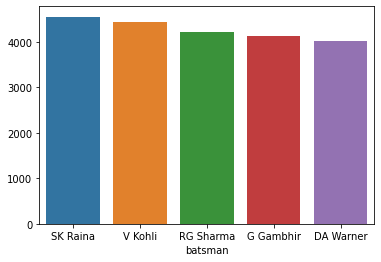

In [65]:
sns.barplot(delieveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:5].index, delieveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:5].values)

In [68]:
list(delieveries_df.groupby('bowler'))

[('A Ashish Reddy',
          match_id  inning           batting_team         bowling_team  over  \
  78028        331       2       Delhi Daredevils      Deccan Chargers     6   
  78029        331       2       Delhi Daredevils      Deccan Chargers     6   
  78030        331       2       Delhi Daredevils      Deccan Chargers     6   
  78031        331       2       Delhi Daredevils      Deccan Chargers     6   
  78032        331       2       Delhi Daredevils      Deccan Chargers     6   
  ...          ...     ...                    ...                  ...   ...   
  138165       584       2  Kolkata Knight Riders  Sunrisers Hyderabad    15   
  138166       584       2  Kolkata Knight Riders  Sunrisers Hyderabad    15   
  138167       584       2  Kolkata Knight Riders  Sunrisers Hyderabad    15   
  138168       584       2  Kolkata Knight Riders  Sunrisers Hyderabad    15   
  138169       584       2  Kolkata Knight Riders  Sunrisers Hyderabad    15   
  
          ball   

In [32]:
delieveries_df[delieveries_df['batsman'] == 'V Kohli'].batsman_runs.sum()

4423

In [74]:
delieveries_df[delieveries_df['is_super_over'] == True]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,...,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127365,536,3,Kings XI Punjab,Rajasthan Royals,1,7,SE Marsh,GJ Maxwell,CH Morris,1,...,0,1,0,0,0,1,1,SE Marsh,run out,NaN
127366,536,4,Rajasthan Royals,Kings XI Punjab,1,1,SR Watson,JP Faulkner,MG Johnson,1,...,0,0,0,0,0,0,0,SR Watson,bowled,NaN
127367,536,4,Rajasthan Royals,Kings XI Punjab,1,2,SPD Smith,JP Faulkner,MG Johnson,1,...,0,0,1,0,4,1,5,NaN,NaN,NaN
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [77]:
len(delieveries_df['match_id'].unique())

636

In [78]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [92]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [85]:
matches_df.groupby('toss_winner').size().sort_values(ascending=False)

toss_winner
Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
dtype: int64

In [88]:
matches_df['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5192ac4cd0>,
 [Text(-0.24250215735914527, 1.072936486319745, 'field'),
  Text(0.24250215735914535, -1.072936486319745, 'bat')],
 [Text(-0.1322739040140792, 0.5852380834471336, '57.08%'),
  Text(0.13227390401407926, -0.5852380834471336, '42.92%')])

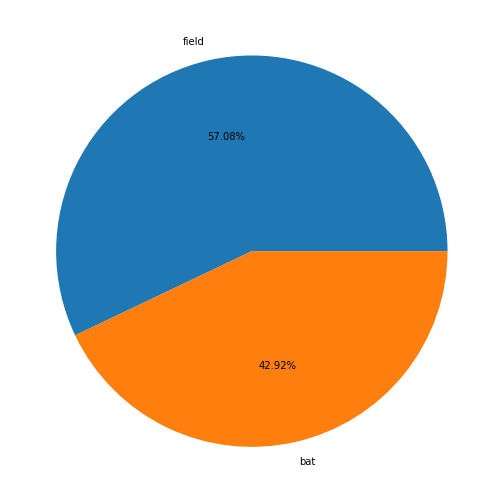

In [100]:
plt.pie(matches_df['toss_decision'].value_counts().values, labels=matches_df['toss_decision'].value_counts().index, autopct='%1.2f%%')

In [101]:
matches_df['dl_applied'].value_counts()

0    620
1     16
Name: dl_applied, dtype: int64